In [128]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
#create a df with all the images of "Sphere definition"

In [130]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [131]:
all_elements_with_uck = pd.read_excel(path_to_xlsx)

In [132]:
sphere_definition_images = all_elements_with_uck[all_elements_with_uck['uck'] == 'Definition of Sphere']

In [133]:
#step 2: drop some colums for cleanness

# Create a copy of the DataFrame slice
sphere_definition_images = sphere_definition_images.copy()

# Drop the columns
sphere_definition_images.drop(['Unnamed: 0', 'uck', 'level'], axis=1, inplace=True)

In [134]:
#step 3: open the df of all elements with all their data to get all the image data for the df of the sphere defition images

In [135]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [136]:
all_elements_full_info = pd.read_excel(path_to_xlsx1)

In [137]:
# Merge the DataFrames on imaage IDs
sphere_defintion_images_full_data = pd.merge(sphere_definition_images, all_elements_full_info, on='images', how='left')

In [138]:
# Drop the columns
sphere_defintion_images_full_data.drop(['label', 'Unnamed: 0', 'authors', 'bid', 'part_or_adaption_label', 'pagenum', 'bb'], axis=1, inplace=True)

In [139]:
#step 4: explode the keyword values so each image is doubled according to the number of relevant keywords:
#CK_Definition of Sphere by Euclid, CK_Definition of Sphere by Theodosius, CK_Additions on Definitions of the Sphere

# Define the relevant keywords
relevant_keywords = {'CK_Definition of Sphere by Euclid', 'CK_Definition of Sphere by Theodosius', 'CK_Additions on Definitions of the Sphere'}

# Step 1: Ensure all entries in 'keywords' are strings and handle NaN values
sphere_defintion_images_full_data['keywords'] = sphere_defintion_images_full_data['keywords'].fillna('').astype(str)

# Step 1: Split the keywords and explode into separate rows
sphere_defintion_images_full_data['keywords'] = sphere_defintion_images_full_data['keywords'].str.split(';')
df_exploded = sphere_defintion_images_full_data.explode('keywords')

# Step 2: Filter rows based on the relevant keywords
sphere_defintion_images_with_ck = df_exploded[df_exploded['keywords'].isin(relevant_keywords)]

# Reset index for better readability
sphere_defintion_images_with_ck = sphere_defintion_images_with_ck.reset_index(drop=True)

In [140]:
#step 5: take all the visual data from the relevant excel file

path_to_xlsx2 = 'G:\\My Drive\\DataFiles\\uck_sphere_definition_sils.xlsx'

In [141]:
visual_data = pd.read_excel(path_to_xlsx2)

In [142]:
#step 6: import all the visual data to the big list off all the elements (sphere definition images)

# Step 1: Merge the DataFrames on the matching columns
sphere_defintion_images_with_ck_and_visual = pd.merge(sphere_defintion_images_with_ck, visual_data, left_on='cluster_name', right_on='label', how='inner')

# Reset the index for better readability
sphere_defintion_images_with_ck_and_visual = sphere_defintion_images_with_ck_and_visual.reset_index(drop=True)


In [143]:
sphere_defintion_images_with_ck_and_visual

,images,keywords,cluster_name,publishers,printers,place,year,book,part_or_adaption,part_type,label,space,time,lines/ color blocks,disproportional decorative elements,lathe machine,double image,titles,index letters,Unnamed: 9
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Seelfisch, Samuel","Säuberlich, Lorenz",Wittenberg,1605,http://sphaera.mpiwg-berlin.mpg.de/id/item/f24...,http://sphaera.mpiwg-berlin.mpg.de/id/part/5c5...,influenced_100,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Krafft the Elder, Johann","Krafft the Elder, Johann",Wittenberg,1550,http://sphaera.mpiwg-berlin.mpg.de/id/item/e7a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Krafft the Elder, Johann","Krafft the Elder, Johann",Wittenberg,1570,http://sphaera.mpiwg-berlin.mpg.de/id/item/89b...,http://sphaera.mpiwg-berlin.mpg.de/id/part/5c5...,influenced_100,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Krafft the Elder, Johann","Krafft the Elder, Johann",Wittenberg,1569,http://sphaera.mpiwg-berlin.mpg.de/id/item/8d4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/b17...,influenced_100,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Krafft the Elder, Johann","Krafft the Elder, Johann",Wittenberg,1551,http://sphaera.mpiwg-berlin.mpg.de/id/item/1bb...,http://sphaera.mpiwg-berlin.mpg.de/id/part/b17...,influenced_100,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_00108,"Landsberg, Martin","Landsberg, Martin",Leipzig,1520,http://sphaera.mpiwg-berlin.mpg.de/id/item/2d3...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,SIL_00108,2D,no,lines,no,no,yes,yes,NaN,NaN
775,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Theodosius,SIL_00108,"Landsberg, Martin","Landsberg, Martin",Leipzig,1500,http://sphaera.mpiwg-berlin.mpg.de/id/item/993...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,SIL_00108,2D,no,lines,no,no,yes,yes,NaN,NaN
776,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_00108,"Landsberg, Martin","Landsberg, Martin",Leipzig,1500,http://sphaera.mpiwg-berlin.mpg.de/id/item/993...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,SIL_00108,2D,no,lines,no,no,yes,yes,NaN,NaN
777,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Theodosius,SIL_00108,"Landsberg, Martin","Landsberg, Martin",Leipzig,1509,http://sphaera.mpiwg-berlin.mpg.de/id/item/91b...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,SIL_00108,2D,no,lines,no,no,yes,yes,NaN,NaN


In [144]:
#visualizations!!

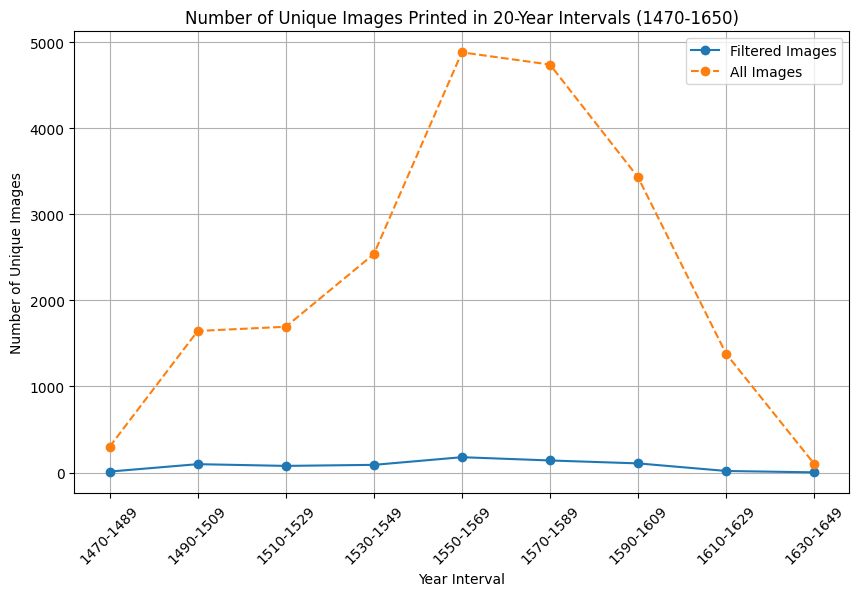

In [145]:
#all the sphere definition images by 20 year intervals

# Assuming your filtered DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'year' and 'images'
filtered_df = sphere_defintion_images_with_ck_and_visual

# Assuming your unfiltered DataFrame is named all_images_df
# and it has columns 'year' and 'images'
all_images_df = all_elements_full_info

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals for the filtered DataFrame
filtered_df['year_interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Group by the 'year_interval' and count the unique number of 'images' in each interval for the filtered DataFrame
filtered_interval_counts = filtered_df.groupby('year_interval', observed=False)['images'].nunique().reset_index()
filtered_interval_counts.rename(columns={'images': 'unique_images_filtered'}, inplace=True)

# Create a new column 'year_interval' to hold the 20-year intervals for the unfiltered DataFrame
all_images_df['year_interval'] = pd.cut(all_images_df['year'], bins=bins, labels=labels, right=False)

# Group by the 'year_interval' and count the unique number of 'images' in each interval for the unfiltered DataFrame
all_interval_counts = all_images_df.groupby('year_interval', observed=False)['images'].nunique().reset_index()
all_interval_counts.rename(columns={'images': 'unique_images_all'}, inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the filtered data
plt.plot(filtered_interval_counts['year_interval'], filtered_interval_counts['unique_images_filtered'], marker='o', linestyle='-', label='Filtered Images')

# Plot the unfiltered data
plt.plot(all_interval_counts['year_interval'], all_interval_counts['unique_images_all'], marker='o', linestyle='--', label='All Images')

# Adding titles and labels
plt.title('Number of Unique Images Printed in 20-Year Intervals (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.grid(True)
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\2565693248.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()


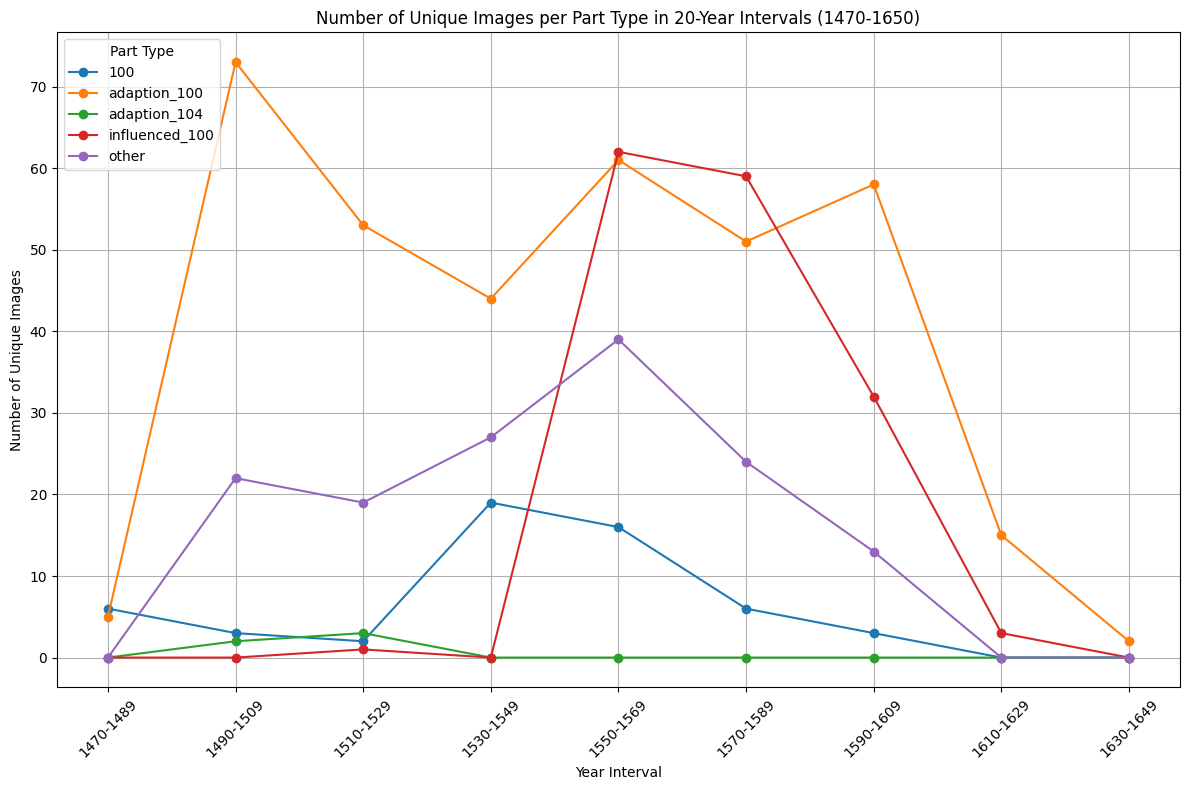

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', and 'part_type'
df = sphere_defintion_images_with_ck_and_visual

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by 'year_interval' and 'part_type', and count the number of unique 'images'
interval_counts = df.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))

# Iterate over each unique part_type to plot
for part_type in interval_counts['part_type'].unique():
    part_type_data = interval_counts[interval_counts['part_type'] == part_type]
    plt.plot(part_type_data['year_interval'], part_type_data['images'], marker='o', label=part_type)

# Adding titles and labels
plt.title('Number of Unique Images per Part Type in 20-Year Intervals (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.grid(True)
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Part Type', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\1635287543.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()


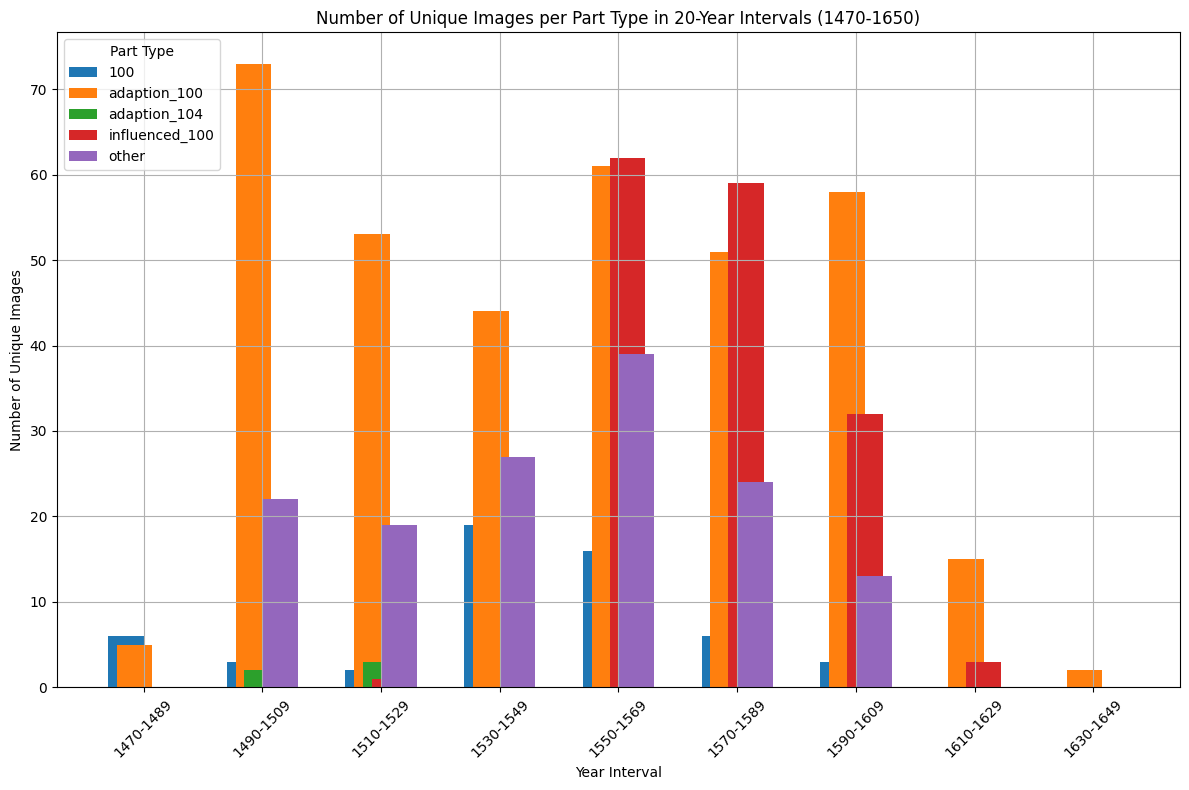

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', and 'part_type'
df = sphere_defintion_images_with_ck_and_visual

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals
df['year_interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Group by 'year_interval' and 'part_type', and count the number of unique 'images'
interval_counts = df.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()

# Pivot the table to have 'year_interval' as index and 'part_type' as columns
pivot_table = interval_counts.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Plotting the data as a grouped bar chart
plt.figure(figsize=(12, 8))

# Get the number of unique part_types
num_part_types = len(pivot_table.columns)

# Define bar width and positions
bar_width = 0.3
bar_positions = np.arange(len(pivot_table.index))

# Calculate offset for each bar
bar_offsets = np.linspace(-0.5 * bar_width, 0.5 * bar_width, num_part_types)

# Iterate over each part_type to plot grouped bars
for i, part_type in enumerate(pivot_table.columns):
    plt.bar(bar_positions + bar_offsets[i], pivot_table[part_type], width=bar_width, label=part_type)

# Adding titles and labels
plt.title('Number of Unique Images per Part Type in 20-Year Intervals (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.grid(True)
plt.xticks(bar_positions, pivot_table.index, rotation=45)

# Adding a legend
plt.legend(title='Part Type', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\2639496849.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_interval_counts = sphere_defintion_images_with_ck_and_visual.groupby('year_interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\2639496849.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_interval_counts = filtered_df.groupby('year_interval')['images'].nunique().reset_index()


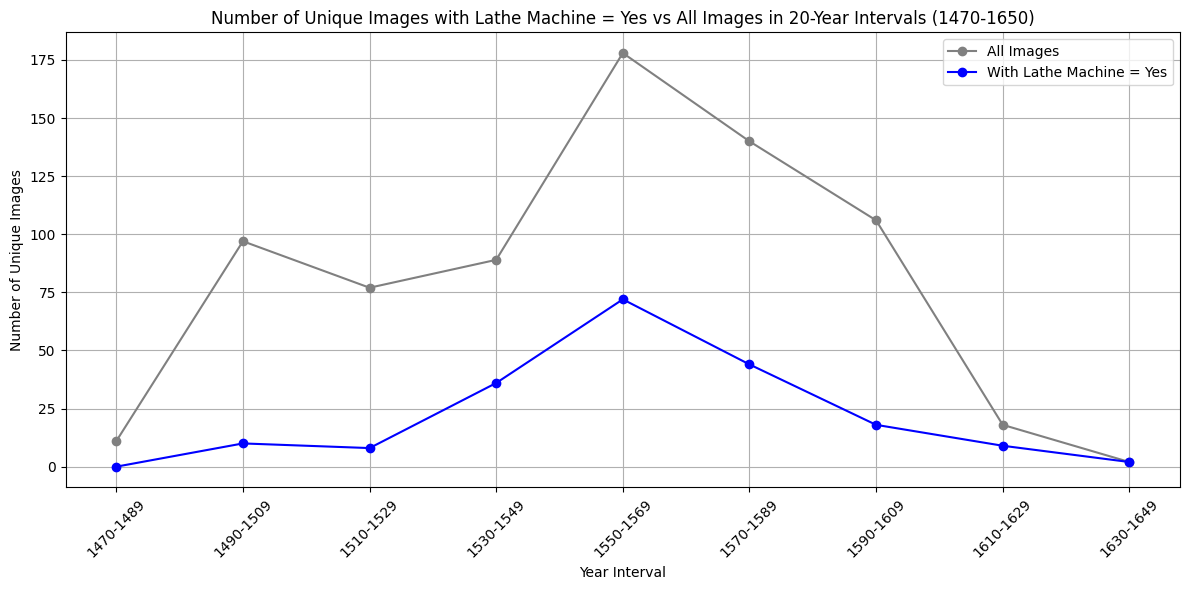

In [148]:

# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', 'part_type', and 'lathe_machine'

# Define the 20-year intervals
bins = list(range(1470, 1660, 20))
labels = [f'{start}-{start+19}' for start in bins[:-1]]

# Create a new column 'year_interval' to hold the 20-year intervals
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=bins, labels=labels, right=False)

# Group by 'year_interval' and count the number of unique 'images' for all data
all_interval_counts = sphere_defintion_images_with_ck_and_visual.groupby('year_interval')['images'].nunique().reset_index()

# Filter the DataFrame for 'lathe_machine' value is 'yes'
filtered_df = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'yes']

# Group by 'year_interval' and count the number of unique 'images' where 'lathe_machine' is 'yes'
filtered_interval_counts = filtered_df.groupby('year_interval')['images'].nunique().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot line for all images
plt.plot(all_interval_counts['year_interval'], all_interval_counts['images'], marker='o', linestyle='-', color='gray', label='All Images')

# Plot line for images with lathe_machine = 'yes'
plt.plot(filtered_interval_counts['year_interval'], filtered_interval_counts['images'], marker='o', linestyle='-', color='b', label='With Lathe Machine = Yes')

# Adding titles and labels
plt.title('Number of Unique Images with Lathe Machine = Yes vs All Images in 20-Year Intervals (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.grid(True)

# Adding a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\4144194646.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_interval_counts = sphere_defintion_images_with_ck_and_visual.groupby('year_interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\4144194646.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_lathe_yes_counts = filtered_lathe_yes.groupby('year_interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\4144194646.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

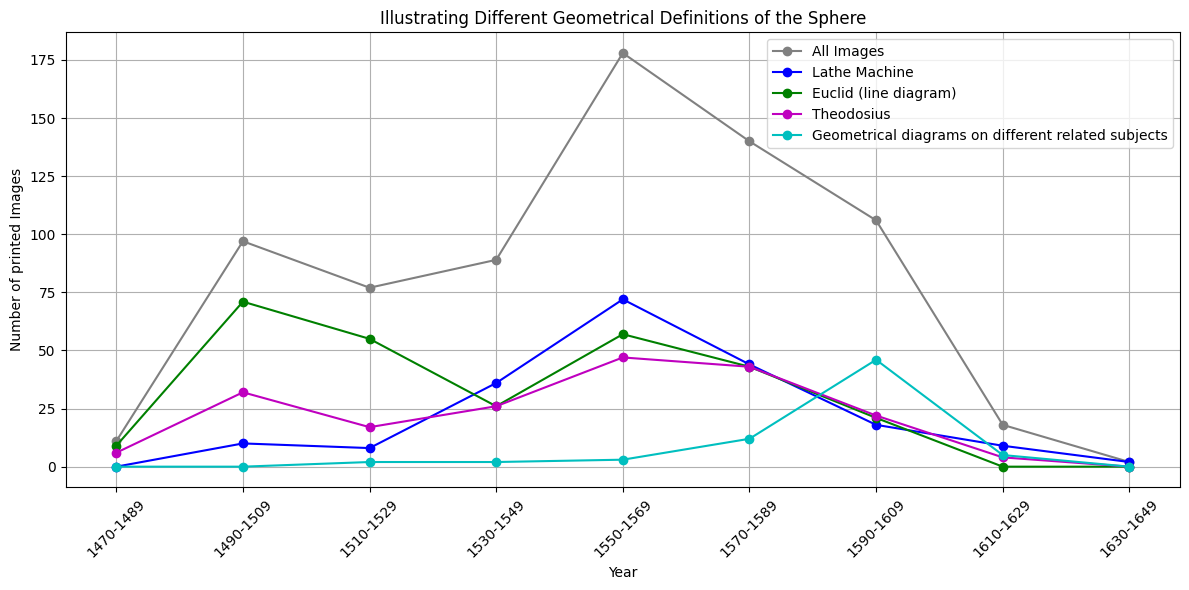

In [149]:
# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', 'part_type', 'lathe_machine', and 'keyword'

# Define the 20-year intervals
bins = list(range(1470, 1660, 20))
labels = [f'{start}-{start+19}' for start in bins[:-1]]

# Create a new column 'year_interval' to hold the 20-year intervals
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=bins, labels=labels, right=False)

# Group by 'year_interval' and count the number of unique 'images' for all data
all_interval_counts = sphere_defintion_images_with_ck_and_visual.groupby('year_interval')['images'].nunique().reset_index()

# Filter the DataFrame for different conditions
# Condition 1: Lathe machine = 'yes'
filtered_lathe_yes = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'yes']
filtered_lathe_yes_counts = filtered_lathe_yes.groupby('year_interval')['images'].nunique().reset_index()

# Condition 2: Lathe machine = 'no' and keyword = 'CK_Definition of Sphere by Euclid'
filtered_lathe_no_euclid = sphere_defintion_images_with_ck_and_visual[(sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'no') &
                                                                      (sphere_defintion_images_with_ck_and_visual['keywords'] == 'CK_Definition of Sphere by Euclid')]
filtered_lathe_no_euclid_counts = filtered_lathe_no_euclid.groupby('year_interval')['images'].nunique().reset_index()

# Condition 3: Keyword = 'CK_Definition of Sphere by Theodosius'
filtered_theodosius = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['keywords'] == 'CK_Definition of Sphere by Theodosius']
filtered_theodosius_counts = filtered_theodosius.groupby('year_interval')['images'].nunique().reset_index()

# Condition 4: Keyword = 'CK_Additions on Definitions of the Sphere'
filtered_additions = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['keywords'] == 'CK_Additions on Definitions of the Sphere']
filtered_additions_counts = filtered_additions.groupby('year_interval')['images'].nunique().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot line for all images
plt.plot(all_interval_counts['year_interval'], all_interval_counts['images'], marker='o', linestyle='-', color='gray', label='All Images')

# Plot line for images with lathe_machine = 'yes'
plt.plot(filtered_lathe_yes_counts['year_interval'], filtered_lathe_yes_counts['images'], marker='o', linestyle='-', color='b', label='Lathe Machine')

# Plot line for images with lathe_machine = 'no' and keyword = 'CK_Definition of Sphere by Euclid'
plt.plot(filtered_lathe_no_euclid_counts['year_interval'], filtered_lathe_no_euclid_counts['images'], marker='o', linestyle='-', color='g', label='Euclid (line diagram)')

# Plot line for images with keyword = 'CK_Definition of Sphere by Theodosius'
plt.plot(filtered_theodosius_counts['year_interval'], filtered_theodosius_counts['images'], marker='o', linestyle='-', color='m', label='Theodosius')

# Plot line for images with keyword = 'CK_Additions on Definitions of the Sphere'
plt.plot(filtered_additions_counts['year_interval'], filtered_additions_counts['images'], marker='o', linestyle='-', color='c', label='Geometrical diagrams on different related subjects')

# Adding titles and labels
plt.title('Illustrating Different Geometrical Definitions of the Sphere')
plt.xlabel('Year')
plt.ylabel('Number of printed Images')
plt.grid(True)

# Adding a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

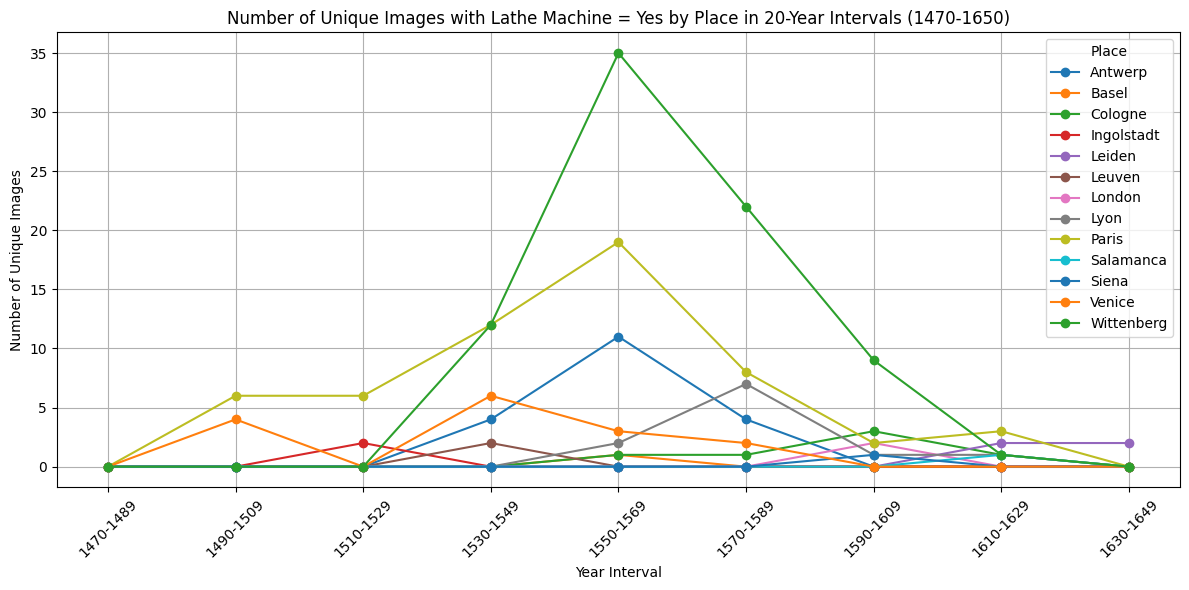

In [150]:

# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', 'part_type', 'lathe_machine', 'keyword', and 'place'

# Define the 20-year intervals
bins = list(range(1470, 1660, 20))
labels = [f'{start}-{start+19}' for start in bins[:-1]]

# Create a new column 'year_interval' to hold the 20-year intervals
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=bins, labels=labels, right=False)

# Filter the DataFrame for lathe_machine = 'yes'
filtered_lathe_yes = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'yes']

# Group by 'year_interval' and 'place', then count the number of unique 'images'
filtered_lathe_yes_counts = filtered_lathe_yes.groupby(['year_interval', 'place'], observed=False)['images'].nunique().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))

# Loop through unique 'place' values and plot a line for each
for place in filtered_lathe_yes_counts['place'].unique():
    data = filtered_lathe_yes_counts[filtered_lathe_yes_counts['place'] == place]
    plt.plot(data['year_interval'], data['images'], marker='o', linestyle='-', label=place)

# Adding titles and labels
plt.title('Number of Unique Images with Lathe Machine = Yes by Place in 20-Year Intervals (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.grid(True)
plt.legend(title='Place', loc='upper right')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (9).

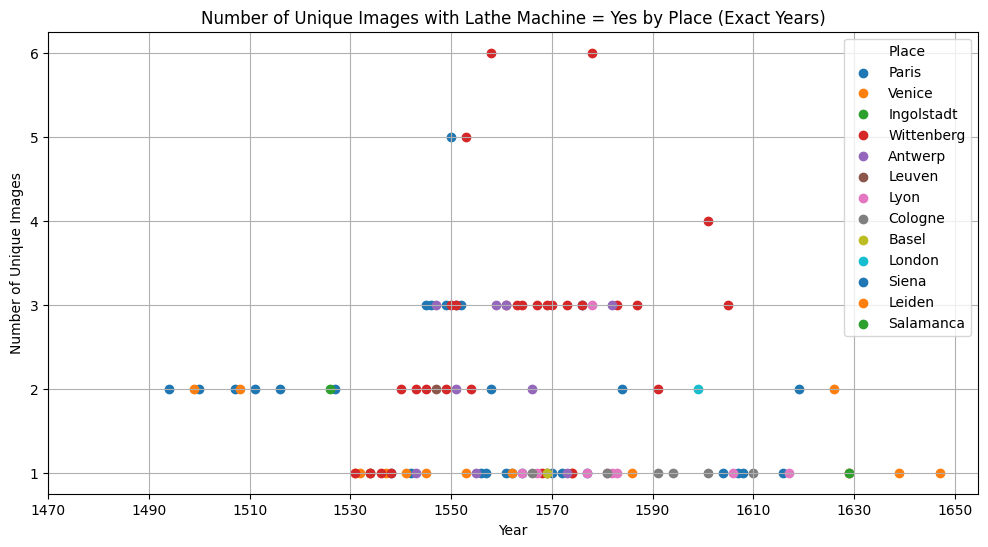

In [151]:

# Assuming your DataFrame is named sphere_defintion_images_with_ck_and_visual
# and it has columns 'images', 'year', 'part_type', 'lathe_machine', 'keyword', and 'place'

# Define the 20-year intervals
bins = list(range(1470, 1660, 20))
labels = [f'{start}-{start+19}' for start in bins[:-1]]

# Create a new column 'year_interval' to hold the 20-year intervals
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=bins, labels=labels, right=False)

# Filter the DataFrame for lathe_machine = 'yes'
filtered_lathe_yes = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'yes']

# Group by 'year' and 'place', then count the number of unique 'images'
grouped = filtered_lathe_yes.groupby(['year', 'place'], observed=False)['images'].nunique().reset_index()

# Plotting the data as a scatter plot
plt.figure(figsize=(12, 6))

# Loop through unique 'place' values and plot scatter points for each
for place in grouped['place'].unique():
    data = grouped[grouped['place'] == place]
    plt.scatter(data['year'], data['images'], marker='o', label=place)

# Adding titles and labels
plt.title('Number of Unique Images with Lathe Machine = Yes by Place (Exact Years)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Images')
plt.grid(True)
plt.legend(title='Place', loc='upper right')

# Customize x-axis tick labels to show intervals
plt.xticks(bins, labels, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\1329924781.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sphere_defintion_images_with_ck_and_visual.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()


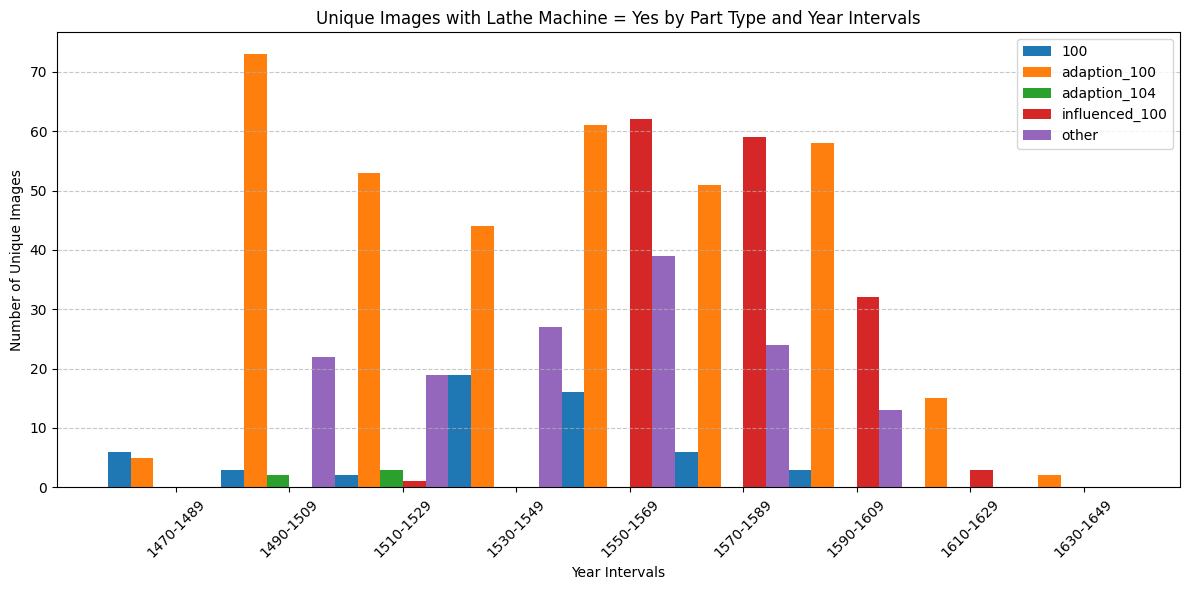

In [152]:

# Define the year intervals
year_intervals = pd.interval_range(start=1470, end=1650, freq=20, closed='left')

# Assign year intervals to each row
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=year_intervals)

# Group by year intervals and part type, count unique images
grouped = sphere_defintion_images_with_ck_and_visual.groupby(['year_interval', 'part_type'])['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Number of bars
n = pivot_df.shape[0]
width = 0.2  # Width of each bar
index = np.arange(n)  # Index for the bars

# Plotting bars for each part type
for i, part_type in enumerate(pivot_df.columns):
    ax.bar(index + i * width, pivot_df[part_type], width=width, label=part_type)

# X-axis settings
ax.set_xlabel('Year Intervals')
ax.set_xticks(index + width * len(pivot_df.columns) / 2)
ax.set_xticklabels([f'{intv.left}-{intv.right-1}' for intv in pivot_df.index], rotation=45)

# Y-axis settings
ax.set_ylabel('Number of Unique Images')
ax.set_title('Unique Images with Lathe Machine = Yes by Part Type and Year Intervals')

# Legend
ax.legend()

# Grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


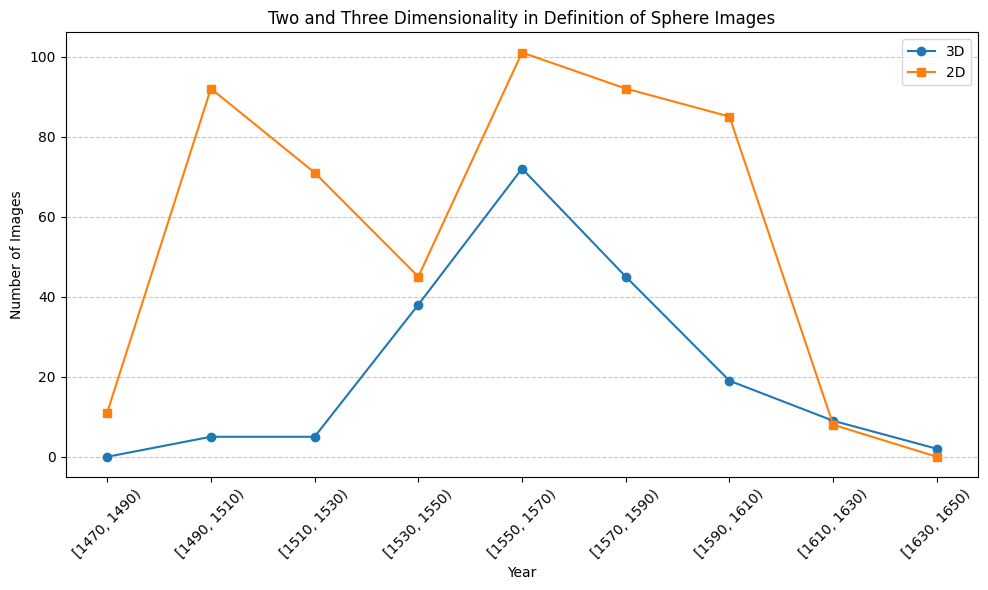

In [153]:
# Define the year intervals
year_intervals = pd.interval_range(start=1470, end=1650, freq=20, closed='left')

# Assign year intervals to each row
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=year_intervals)

# Filter for '3D' and '2D' part types
filtered_df = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['space'].isin(['3D', '2D'])]

# Group by year intervals and part type, count unique images
grouped = filtered_df.groupby(['year_interval', 'space'], observed=False)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='space', values='images').fillna(0)

# Convert interval index to string labels
pivot_df.index = pivot_df.index.astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for 3D and 2D if columns exist
if '3D' in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df['3D'], marker='o', linestyle='-', label='3D')

if '2D' in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df['2D'], marker='s', linestyle='-', label='2D')

# X-axis settings
ax.set_xlabel('Year')
ax.set_xticks(range(len(pivot_df.index)))
ax.set_xticklabels(pivot_df.index, rotation=45)

# Y-axis settings
ax.set_ylabel('Number of Images')
ax.set_title('Two and Three Dimensionality in Definition of Sphere Images')

# Legend
ax.legend()

# Grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

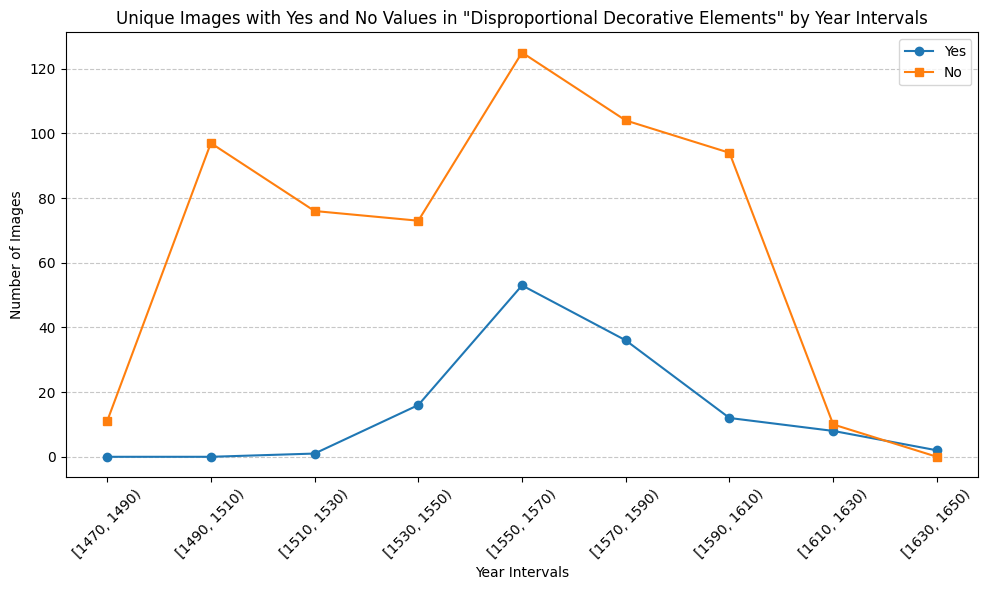

In [154]:
# Define the year intervals
year_intervals = pd.interval_range(start=1470, end=1650, freq=20, closed='left')

# Assign year intervals to each row
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=year_intervals)

# Filter for 'yes' and 'no' in 'disproportional decorative elements'
filtered_df = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['disproportional decorative elements'].isin(['yes', 'no'])]

# Group by year intervals and 'disproportional decorative elements', count unique images
grouped = filtered_df.groupby(['year_interval', 'disproportional decorative elements'], observed=False)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='disproportional decorative elements', values='images').fillna(0)

# Convert interval index to string labels
pivot_df.index = pivot_df.index.astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for 'yes' and 'no' if columns exist
if 'yes' in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df['yes'], marker='o', linestyle='-', label='Yes')

if 'no' in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df['no'], marker='s', linestyle='-', label='No')

# X-axis settings
ax.set_xlabel('Year Intervals')
ax.set_xticks(range(len(pivot_df.index)))
ax.set_xticklabels(pivot_df.index, rotation=45)

# Y-axis settings
ax.set_ylabel('Number of Images')
ax.set_title('Unique Images with Yes and No Values in "Disproportional Decorative Elements" by Year Intervals')

# Legend
ax.legend()

# Grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

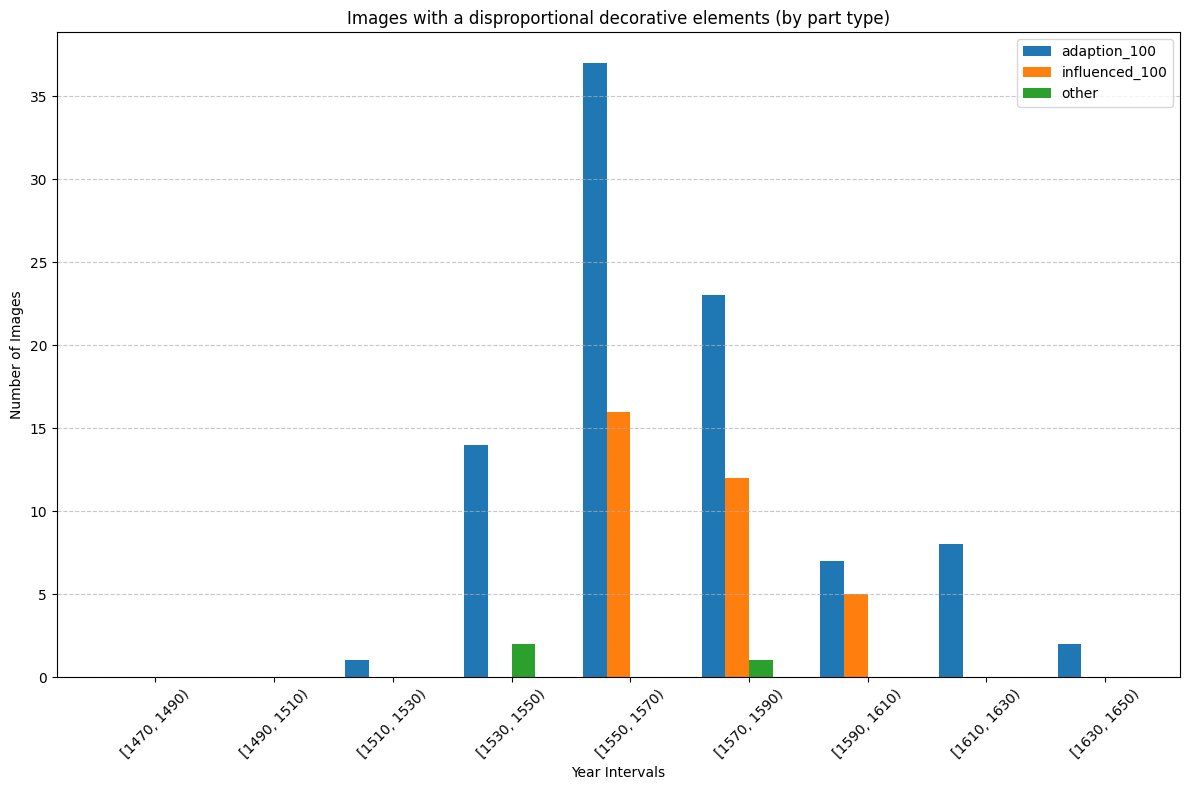

In [155]:
# Define the year intervals
year_intervals = pd.interval_range(start=1470, end=1650, freq=20, closed='left')

# Assign year intervals to each row
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=year_intervals)

# Filter for 'yes' in 'disproportional decorative elements'
filtered_df = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['disproportional decorative elements'] == 'yes']

# Group by year intervals and part type, count unique images
grouped = filtered_df.groupby(['year_interval', 'part_type'], observed=False)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Convert interval index to string labels
pivot_df.index = pivot_df.index.astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Getting unique part types
part_types = pivot_df.columns

# Bar width
bar_width = 0.2
index = np.arange(len(pivot_df.index))

# Plot bars for each part type
for i, part_type in enumerate(part_types):
    ax.bar(index + i * bar_width, pivot_df[part_type], bar_width, label=part_type)

# X-axis settings
ax.set_xlabel('Year Intervals')
ax.set_xticks(index + (len(part_types) * bar_width) / 2)
ax.set_xticklabels(pivot_df.index, rotation=45)

# Y-axis settings
ax.set_ylabel('Number of Images')
ax.set_title('Images with a disproportional decorative elements (by part type)')

# Legend
ax.legend()

# Grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


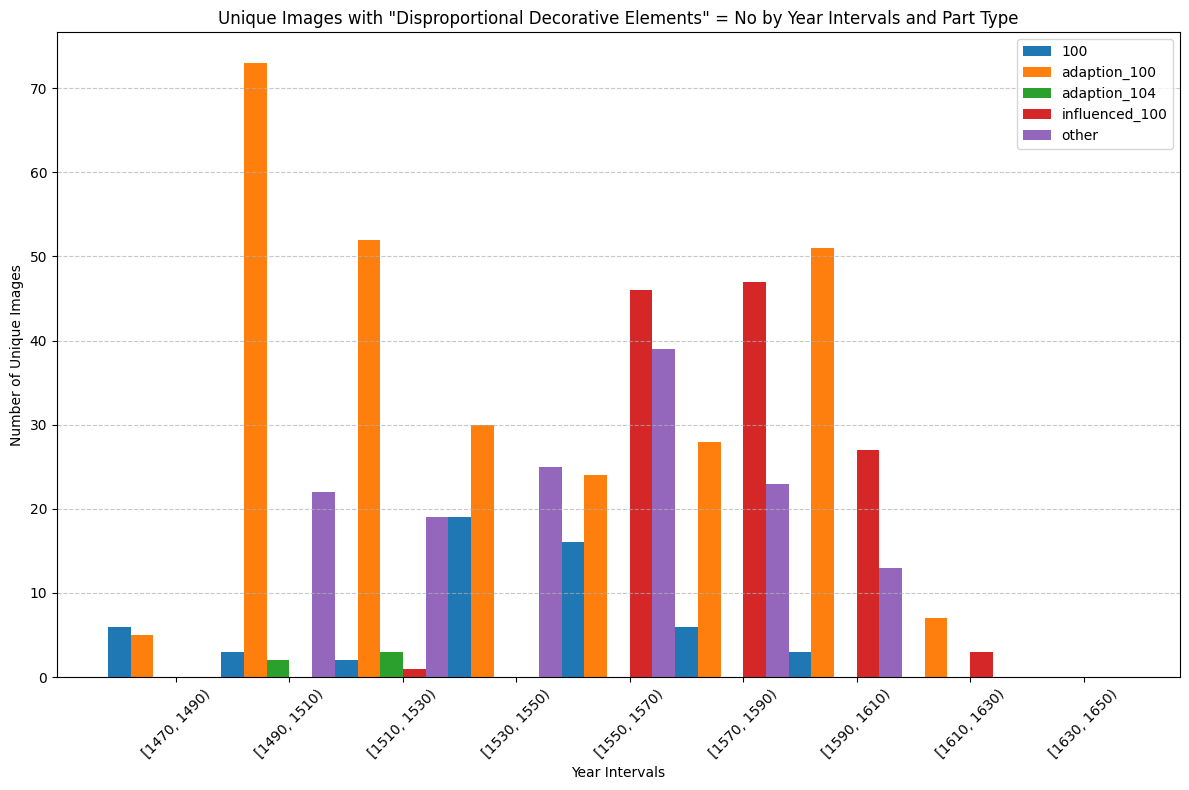

In [156]:
# Define the year intervals
year_intervals = pd.interval_range(start=1470, end=1650, freq=20, closed='left')

# Assign year intervals to each row
sphere_defintion_images_with_ck_and_visual['year_interval'] = pd.cut(sphere_defintion_images_with_ck_and_visual['year'], bins=year_intervals)

# Filter for 'yes' in 'disproportional decorative elements'
filtered_df = sphere_defintion_images_with_ck_and_visual[sphere_defintion_images_with_ck_and_visual['disproportional decorative elements'] == 'no']

# Group by year intervals and part type, count unique images
grouped = filtered_df.groupby(['year_interval', 'part_type'], observed=False)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Convert interval index to string labels
pivot_df.index = pivot_df.index.astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Getting unique part types
part_types = pivot_df.columns

# Bar width
bar_width = 0.2
index = np.arange(len(pivot_df.index))

# Plot bars for each part type
for i, part_type in enumerate(part_types):
    ax.bar(index + i * bar_width, pivot_df[part_type], bar_width, label=part_type)

# X-axis settings
ax.set_xlabel('Year Intervals')
ax.set_xticks(index + (len(part_types) * bar_width) / 2)
ax.set_xticklabels(pivot_df.index, rotation=45)

# Y-axis settings
ax.set_ylabel('Number of Unique Images')
ax.set_title('Unique Images with "Disproportional Decorative Elements" = No by Year Intervals and Part Type')

# Legend
ax.legend()

# Grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [157]:
#21/7/24: total books in the corpus and book with sphere definition images.
#all the books, plot
#all the unique book values with imgaes that have "sphere definition" uck 
#two lines one plot 20 year intervals

path_to_csv = 'G:\\My Drive\\DataFiles\\booksSacrobosco.csv'
all_books = pd.read_csv(path_to_csv)

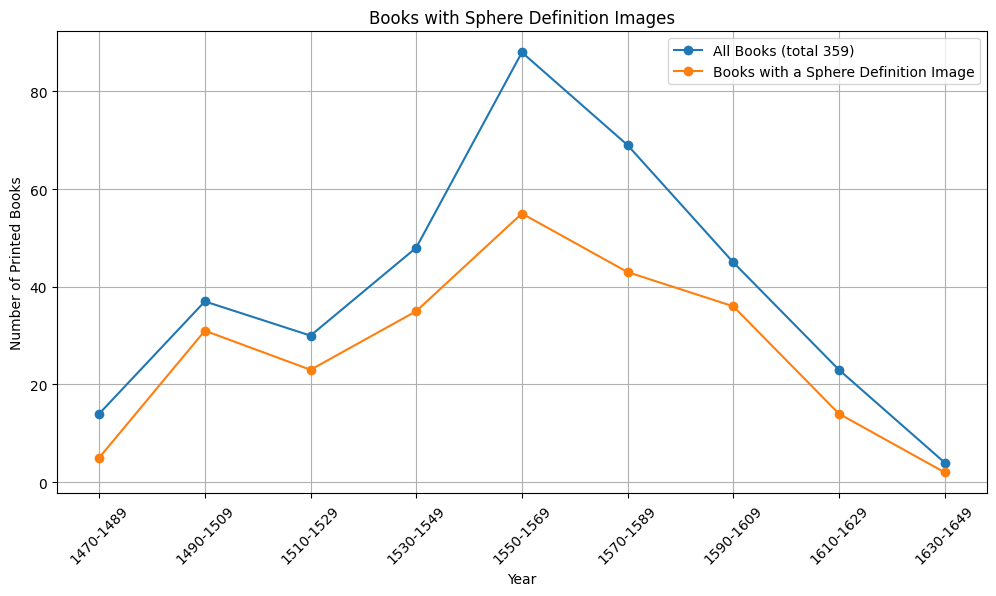

In [158]:
# Create twenty-year intervals
bins = list(range(1470, 1670, 20))
labels = [f'{i}-{i+19}' for i in bins[:-1]]

# Function to calculate unique values per interval
def calculate_unique_counts(df, year_col, value_col, bins, labels):
    df['interval'] = pd.cut(df[year_col], bins=bins, labels=labels, right=False)
    unique_counts = df.groupby('interval', observed=True)[value_col].nunique().reset_index()
    unique_counts.columns = ['interval', value_col]
    unique_counts = unique_counts.set_index('interval').reindex(labels, fill_value=0).reset_index()
    return unique_counts

# Calculate unique counts
all_books_unique_counts = calculate_unique_counts(all_books, 'year_published_from', 'subject', bins, labels)
sphere_unique_counts = calculate_unique_counts(sphere_defintion_images_with_ck_and_visual, 'year', 'book', bins, labels)

# Merge the two DataFrames on interval
combined_counts = pd.merge(all_books_unique_counts, sphere_unique_counts, on='interval', how='outer').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(combined_counts['interval'], combined_counts['subject'], marker='o', label='All Books (total 359)')
plt.plot(combined_counts['interval'], combined_counts['book'], marker='o', label='Books with a Sphere Definition Image')

plt.xlabel('Year')
plt.ylabel('Number of Printed Books')
plt.title('Books with Sphere Definition Images')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\306308216.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval'] = pd.cut(df['year'], bins=bins, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_2780\306308216.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('interval')['images'].nunique()


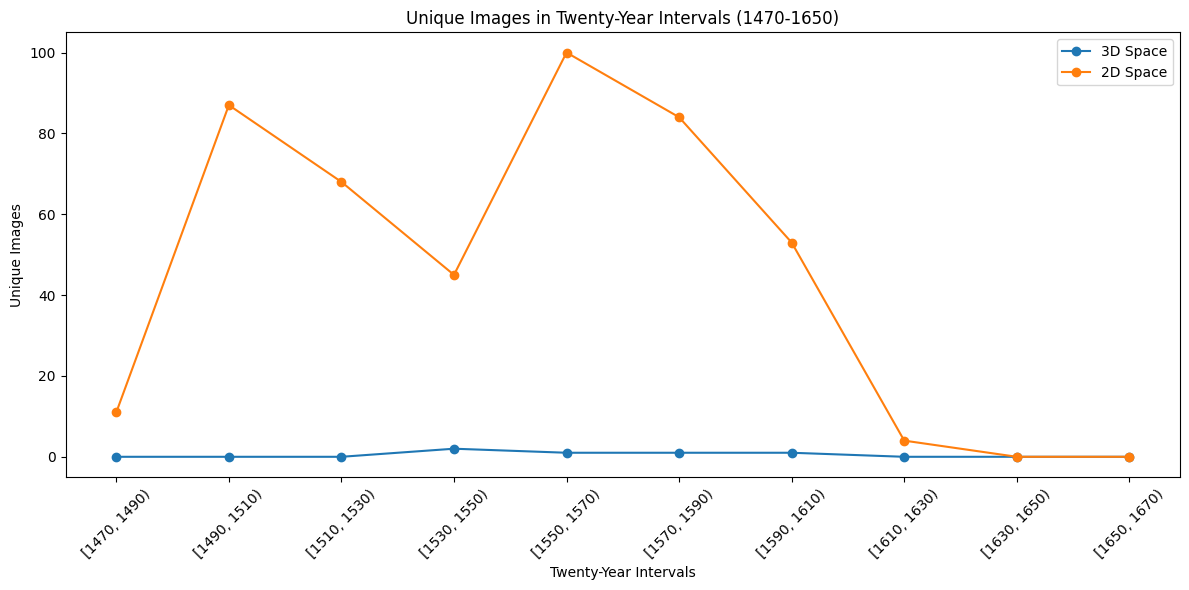

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named sphere_definition_images_with_ck_and_visual

# Define the twenty-year intervals
bins = list(range(1470, 1671, 20))

# Filter the DataFrame based on the conditions
filtered_df_3D = sphere_defintion_images_with_ck_and_visual[
    (sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'no') &
    (sphere_defintion_images_with_ck_and_visual['space'] == '3D')
]

filtered_df_2D = sphere_defintion_images_with_ck_and_visual[
    (sphere_defintion_images_with_ck_and_visual['lathe machine'] == 'no') &
    (sphere_defintion_images_with_ck_and_visual['space'] == '2D')
]

# Create a function to count unique images per interval
def count_unique_images(df):
    df['interval'] = pd.cut(df['year'], bins=bins, right=False)
    return df.groupby('interval')['images'].nunique()

# Count unique images for both filtered DataFrames
unique_images_3D = count_unique_images(filtered_df_3D)
unique_images_2D = count_unique_images(filtered_df_2D)

# Combine the results into a single DataFrame
combined_df = pd.DataFrame({
    '3D Space': unique_images_3D,
    '2D Space': unique_images_2D
}).fillna(0).reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))

plt.plot(combined_df['interval'].astype(str), combined_df['3D Space'], marker='o', label='3D Space')
plt.plot(combined_df['interval'].astype(str), combined_df['2D Space'], marker='o', label='2D Space')

# Add labels and legend
plt.xlabel('Twenty-Year Intervals')
plt.ylabel('Unique Images')
plt.title('Unique Images in Twenty-Year Intervals (1470-1650)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
